C:\Users\Assad\AppData\Local\Temp\ipykernel_15852\4238456976.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='center_name', x='Total Attendance', data=attendance_summary.sort_values(by='Total Attendance', ascending=False), palette='Blues_r')


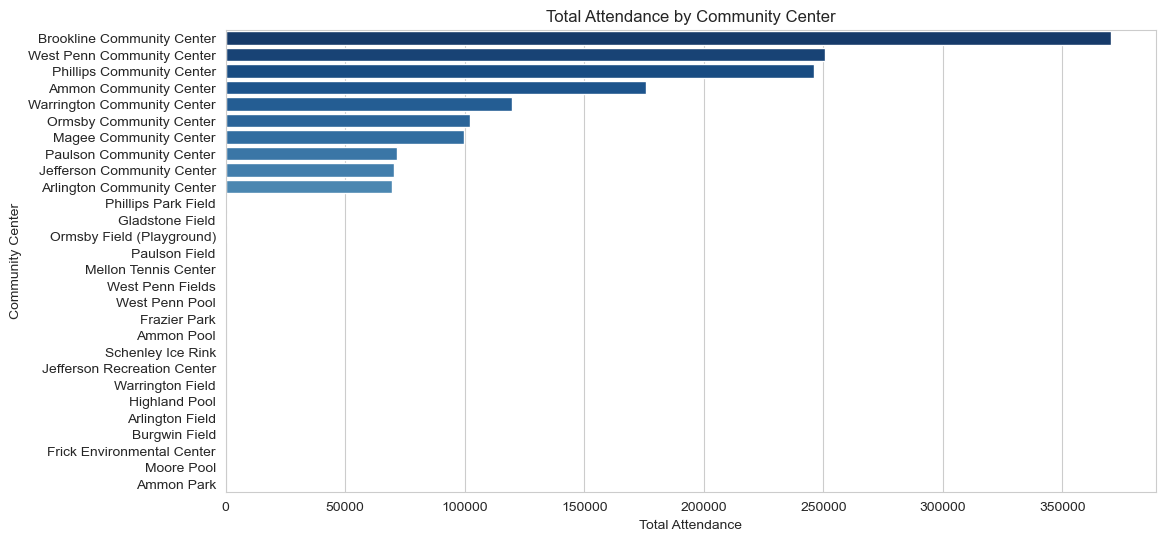

C:\Users\Assad\AppData\Local\Temp\ipykernel_15852\4238456976.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='center_name', x='Average Attendance', data=attendance_summary.sort_values(by='Average Attendance', ascending=False), palette='Greens_r')


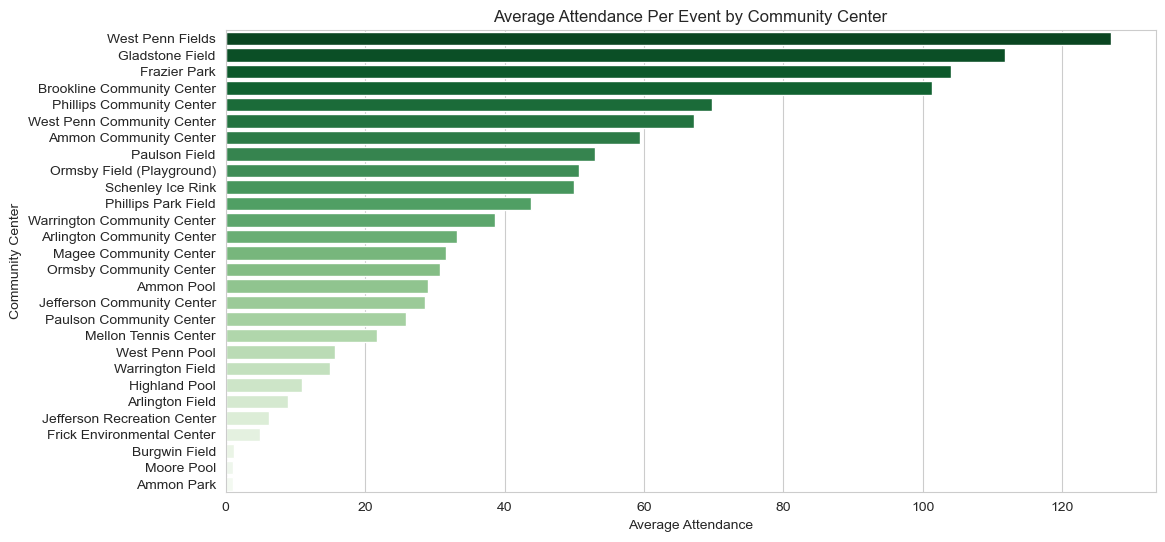

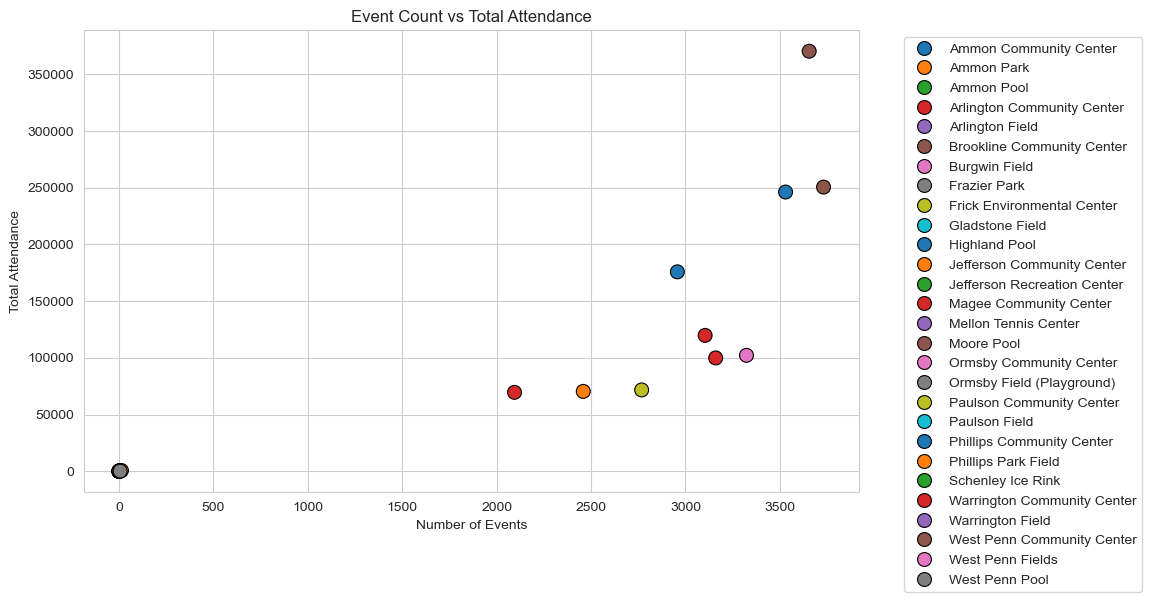

C:\Users\Assad\AppData\Local\Temp\ipykernel_15852\4238456976.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='center_name', y='attendance_count', data=df, palette='coolwarm')


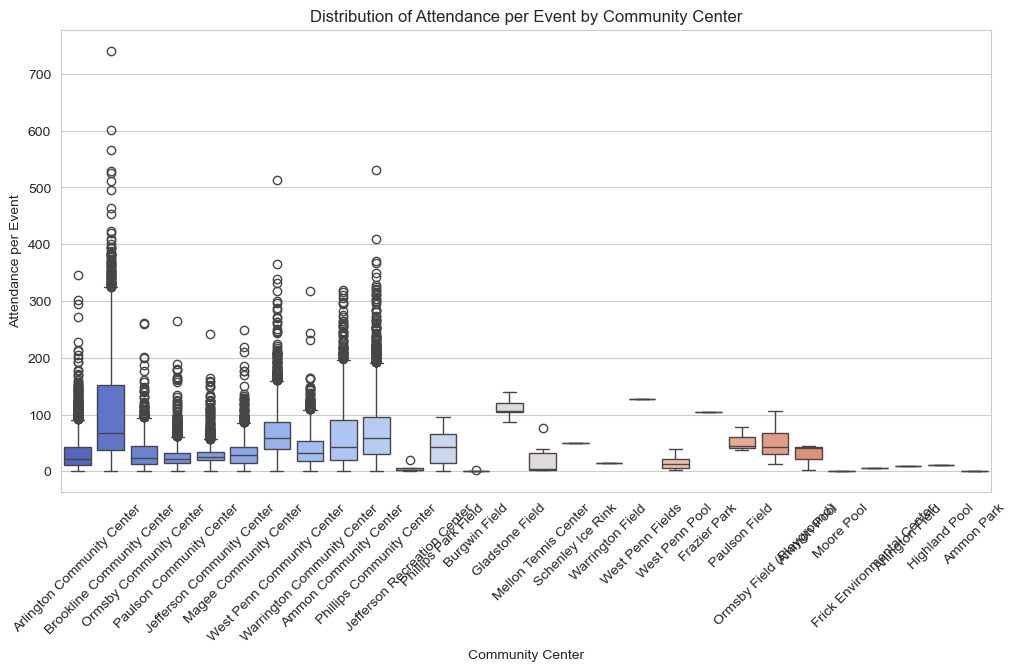

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("FinalProject/b7cb30c8-b179-43ff-8655-f24880b0f578.csv")

# Strip any leading or trailing spaces in column names
df.columns = df.columns.str.strip()

# Summarize attendance per community center
attendance_summary = df.groupby('center_name')['attendance_count'].agg(['sum', 'mean', 'count']).reset_index()
attendance_summary = attendance_summary.rename(columns={'sum': 'Total Attendance', 'mean': 'Average Attendance', 'count': 'Event Count'})

# Set style
sns.set_style("whitegrid")

# Bar plot - Total Attendance per Community Center
plt.figure(figsize=(12,6))
sns.barplot(y='center_name', x='Total Attendance', data=attendance_summary.sort_values(by='Total Attendance', ascending=False), palette='Blues_r')
plt.title('Total Attendance by Community Center')
plt.xlabel('Total Attendance')
plt.ylabel('Community Center')
plt.show()

# Bar plot - Average Attendance per Event
plt.figure(figsize=(12,6))
sns.barplot(y='center_name', x='Average Attendance', data=attendance_summary.sort_values(by='Average Attendance', ascending=False), palette='Greens_r')
plt.title('Average Attendance Per Event by Community Center')
plt.xlabel('Average Attendance')
plt.ylabel('Community Center')
plt.show()

# Scatter plot - Event Count vs Total Attendance
plt.figure(figsize=(10,6))
sns.scatterplot(x='Event Count', y='Total Attendance', data=attendance_summary, hue='center_name', palette='tab10', s=100, edgecolor='black')
plt.title('Event Count vs Total Attendance')
plt.xlabel('Number of Events')
plt.ylabel('Total Attendance')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Box plot - Distribution of Attendance per Event
plt.figure(figsize=(12,6))
sns.boxplot(x='center_name', y='attendance_count', data=df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Distribution of Attendance per Event by Community Center')
plt.xlabel('Community Center')
plt.ylabel('Attendance per Event')
plt.show()


                                        neighborhoods  gifted_pct    iep_pct  \
33                                       Point Breeze   31.699346  10.457516   
41  Squirrel Hill South, Regent Square, Swisshelm ...   32.223702   9.187750   
40                                Squirrel Hill North   32.926829   6.097561   
21                                      Highland Park   21.727749  11.780105   
37                                   South Side Flats   13.761468  22.018349   
10                       Central, Upper Lawrenceville   13.617021  20.851064   
34                                 Point Breeze North   14.728682  17.829457   
18                                         Greenfield   18.046709  12.526539   
4                              Bloomfield, Friendship   14.776632  17.182131   
38                                  South Side Slopes    7.344633  27.118644   

    education_score  
33        23.202614  
41        23.009321  
40        22.195122  
21        17.748691  
37       

<Figure size 1200x800 with 0 Axes>

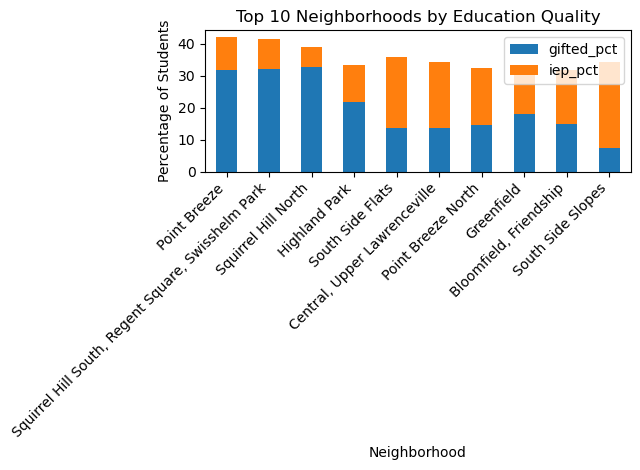


The best neighborhood for education is: Point Breeze
Gifted percentage: 31.70%
IEP percentage: 10.46%
Education score: 23.20


In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('neighborhood_iep.csv')

# Calculate percentages
df['gifted_pct'] = (df['gifted'] / df['total_enrollment_k_12']) * 100
df['iep_pct'] = (df['other_iep'] / df['total_enrollment_k_12']) * 100
df['regular_pct'] = (df['not_iep_or_gifted'] / df['total_enrollment_k_12']) * 100

# Create a combined score (weighted average)
# We'll weight gifted percentage more heavily as it indicates advanced opportunities
df['education_score'] = (df['gifted_pct'] * 0.6) + (df['iep_pct'] * 0.4)

# Sort by the education score
sorted_df = df.sort_values('education_score', ascending=False)

# Display top 10 neighborhoods
top_10 = sorted_df[['neighborhoods', 'gifted_pct', 'iep_pct', 'education_score']].head(10)
print(top_10)

# Visualization
plt.figure(figsize=(12, 8))
top_10.plot(x='neighborhoods', y=['gifted_pct', 'iep_pct'], kind='bar', stacked=True)
plt.title('Top 10 Neighborhoods by Education Quality')
plt.ylabel('Percentage of Students')
plt.xlabel('Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Show the best neighborhood
best_neighborhood = sorted_df.iloc[0]
print(f"\nThe best neighborhood for education is: {best_neighborhood['neighborhoods']}")
print(f"Gifted percentage: {best_neighborhood['gifted_pct']:.2f}%")
print(f"IEP percentage: {best_neighborhood['iep_pct']:.2f}%")
print(f"Education score: {best_neighborhood['education_score']:.2f}")